<a href="https://colab.research.google.com/github/priba/kornia-examples/blob/master/color_adjust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color adjustment

In this tutorial we are going to learn how to adjust the color in image batches.

## Install Kornia

In [4]:
#!pip install git+https://github.com/kornia/kornia

import kornia
print(f"Kornia version: {kornia.__version__}")

Kornia version: 0.2.0+cb9373b


## Prepare the data

Download an example image

Load the image using OpenCV and plot it


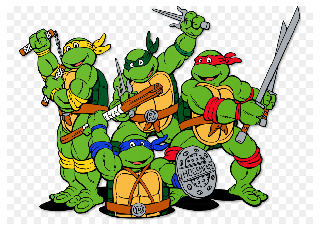

In [20]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# load using opencv and convert to RGB
img_bgr: np.array = cv2.imread('data/color/ninja_turtles.jpg', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

Create a batch of 4 identical images and normalize it between [0,1]


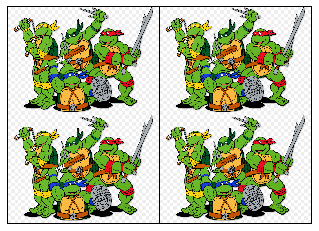

In [21]:
import torch
import torchvision

def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

# stack four identical images
data: torch.Tensor = kornia.image_to_tensor(img_rgb)  # 1xCxHxW
data = data.expand(4, -1, -1, -1)  # 4xCxHxW

# normalize
data = kornia.normalize(data.float(), 0., 255.)

# plot
imshow(data)

## Perform the color adjustments


### Brightness

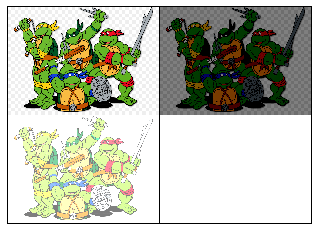

In [22]:
# Brightness
x_brightness: torch.Tensor = kornia.adjust_brightness(data.cuda(), torch.Tensor([0, -0.5, 0.5, 1]))
imshow(x_brightness)

### Contrast

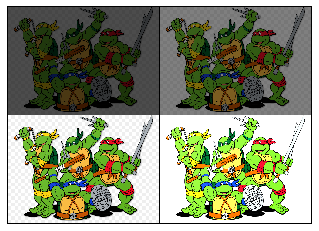

In [23]:
# Contrast
x_contrast: torch.Tensor = kornia.adjust_contrast(data, torch.Tensor([0.3, 0.5, 1, 1.5]))
imshow(x_contrast)

### Gamma

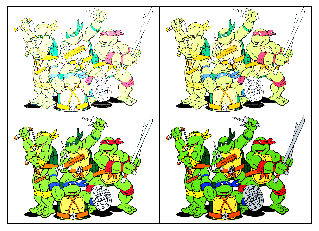

In [24]:
# Gamma
x_gamma: torch.Tensor = kornia.adjust_gamma(data, gamma=torch.Tensor([0.3, 0.5, 1, 1.5]), gain=1.5)
imshow(x_gamma)

### Saturation

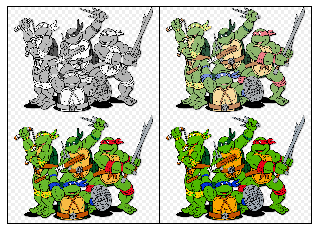

In [25]:
# Saturation
x_saturated: torch.Tensor = kornia.adjust_saturation(data, torch.Tensor([0, 0.5, 1, 1.5]))
imshow(x_saturated)

### Hue

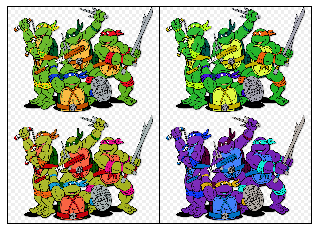

In [26]:
# Hue
x_hue: torch.Tensor = kornia.adjust_hue(data, torch.Tensor([0, 0.5, -0.5, kornia.pi]))
imshow(x_hue)